In [1]:
# 导入包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [2]:
# 导入数据
train_data=pd.read_csv("/Users/chixinning/Desktop/kaggle/KaggleMyOwn/Mycode/raw_data/train.csv")

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.index=train_data["Id"]
train_data.drop("Id", axis=1, inplace=True)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

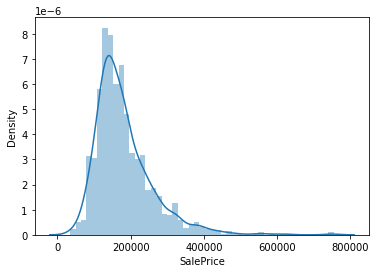

In [8]:
# 通过describe 去看fat-tail
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
#histogram
sns.distplot(train_data['SalePrice'])

In [9]:
# 如何找到categorical和numerical的特征？
numerical = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
numerical.remove('SalePrice')
print("the count of numerical_features: ",len(numerical))
categorical = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
print("the count of categorical_features: ",len(categorical))

the count of numerical_features:  36
the count of categorical_features:  43


In [10]:
print(" numerical features are: ",numerical)

 numerical features are:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
print(" categorical features are: ",categorical)

 categorical features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
# 缺失值处理
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("how many data has missing value = " + str(sum(missing_data['Total'] >= 1)))

how many data has missing value = 19


In [13]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [14]:
categorical_missing=[f for f in missing_data[:19].index if f in categorical]
numerical_missing=[f for f in missing_data[:19].index if f in numerical]

In [15]:
print("numerical_missing are :",numerical_missing)

numerical_missing are : ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [16]:
print("categorical_missing are :",categorical_missing)

categorical_missing are : ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [17]:
# 对categorical类型的缺失值填补直接使用fillna("None")
# for f in categorical_missing:
#     train_data[f]=train_data[f].fillna("None")
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
        ,'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
        'Fence','MiscFeature','MasVnrType']
for i in cols:
    train_data[i] = train_data[i].fillna('None')
'''
BsmtUnfSF:Unfinished square feet of basement area
BsmtFinSF2:Type 2 finished square feet
BsmtFinSF1: Type 1 finished square feet 
TotalBsmtSF: Total square feet of basement area
表示地下室某种面积，直接填充0.
'''
train_data['BsmtUnfSF'] = train_data['BsmtUnfSF'].fillna(0)
train_data['BsmtFinSF2'] = train_data['BsmtFinSF2'].fillna(0)
train_data['BsmtFinSF1'] = train_data['BsmtFinSF1'].fillna(0)
train_data['TotalBsmtSF'] = train_data['TotalBsmtSF'].fillna(0)

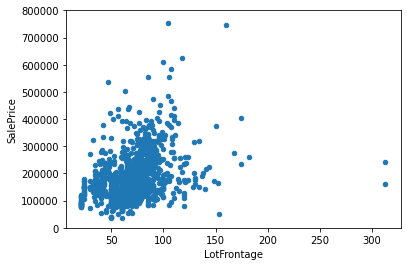

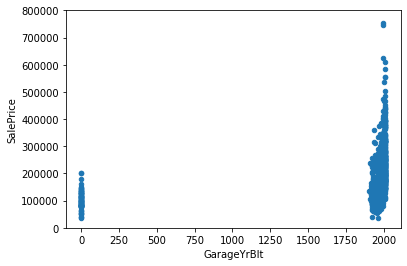

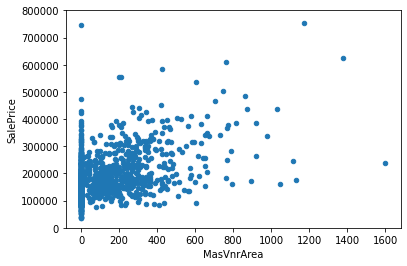

In [18]:
# 对数值型的用median//mode填补
# numerical_missing are : ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
# LotFrontage:Linear feet of street connected to property
# GarageYrBlt:Year garage was built,虽然是数值型的，但是这个值缺失很可能表示并没有车库这种东西
train_data["GarageYrBlt"]=train_data["GarageYrBlt"].fillna(0)
# MasVnrArea:Masonry veneer area in square feet,表示墙面砖的大小，对缺失值用mode/median
# 先分别对三个feature画图可视化，以理解他们各自的含义
for var in numerical_missing:
    data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [19]:
# LotFrontage表示房子临近的街道，参考kaggle上大神的思路：居住在一起的人LotFrontage是相似的，我们将邻居的LotFrontage填充进来；
# Reference:https://zhuanlan.zhihu.com/p/46855142
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
# train_data["LotFrontage"]=train_data["LotFrontage"].fillna(train_data["LotFrontage"].median())
# train_data["LotFrontage"]=train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0])

In [20]:
train_data["MasVnrArea"]=train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].median())
train_data["MasVnrArea"]=train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mode()[0])

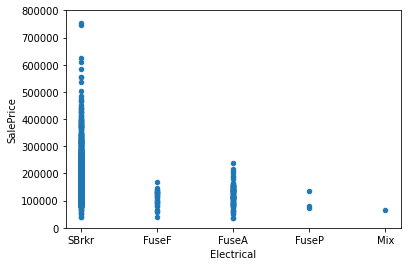

In [21]:
# Electrical  是有一个缺失值
# 先数据可视化
train_data["Electrical"]=train_data["Electrical"].fillna(train_data["Electrical"].mode()[0]) # 由可视化所以觉得应该使用mode进行填补
data = pd.concat([train_data['SalePrice'], train_data["Electrical"]], axis=1)
data.plot.scatter(x="Electrical", y='SalePrice', ylim=(0,800000));

In [22]:
#just checking that there's no missing data missing
train_data.isnull().sum().max() 

0

In [23]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [24]:
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

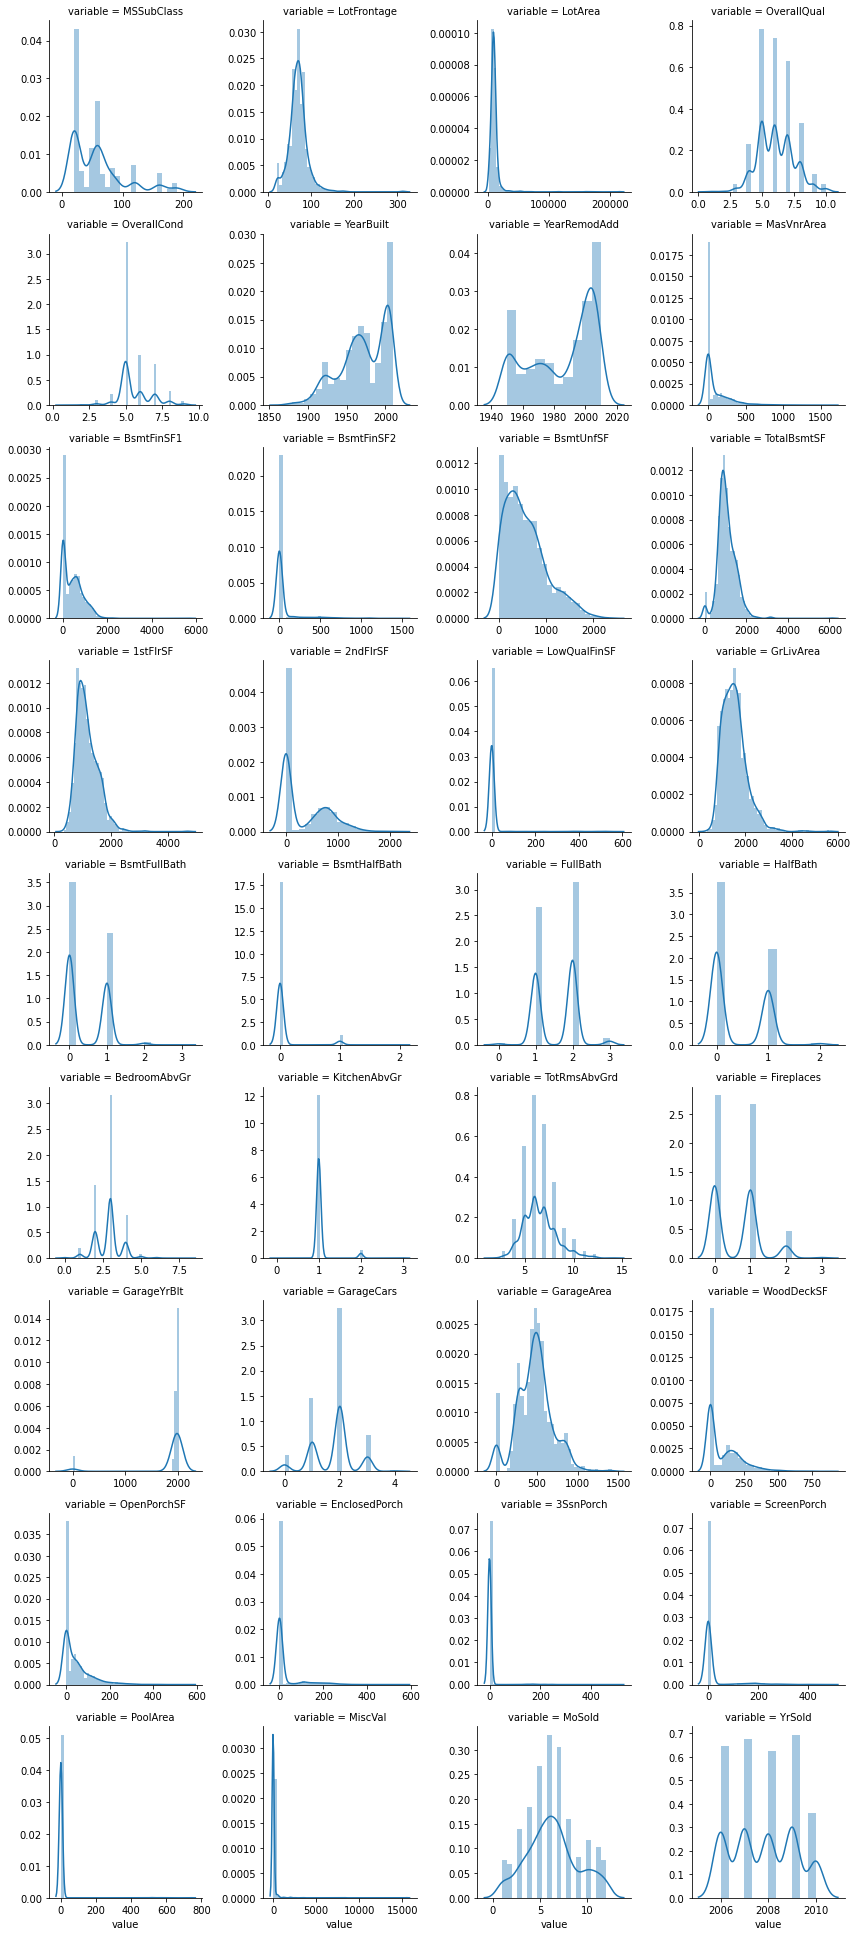

In [25]:
# numerical 2 categorical
train_data_numerical_plot = pd.melt(train_data,value_vars = numerical)
#seaborn的FacetGrid()函数可以做出此类数据的分布和拟合曲线
plot = sns.FacetGrid(train_data_numerical_plot,col = 'variable',col_wrap = 4,sharex = False,sharey = False)
show_plot = plot.map(sns.distplot,'value')
plt.show()

In [26]:
# 从上面的numerical找出可以变成categorical的
# YrSold/MoSold/GarageYrBlt/YearBuilt(这里时间序列不考虑了吗)
# train_data.groupby('YrSold').sum()
# 由打印出来的数据可知，YrSold为Categorical变量:2006,2007,2008,2009,2010
# YearRemodAdd:YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['YearRemodAdd'] = train_data['YearRemodAdd'].astype(str)

In [27]:
#3.3 convert numerical variables to categorical variables
# MSSubClass: Identifies the type of dwelling involved in the sale.	
train_data = train_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [28]:
# 将 numerical_features 转换成 categorical_features后的更新
numerical = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
print("the count of numerical_features: ",len(numerical))

the count of numerical_features:  33


In [29]:
col=['Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']
# 'CentralAir','SaleCondition'

In [30]:
# train_data.groupby("BsmtQual").count()
# train_data.groupby("BsmtQual").count().shape[0]

In [31]:
# map_dict_col=[]
# for i in col:
#     ans=train_data.groupby(i).count()
#     rows_num=ans.shape[0]
#     map_dict={}
#     for key_index in ans.index:
#         if key_index=='None':
#             map_dict[key_index]=0
#         elif key_index==
#     map_dict_single={}
#     map_dict_single[i]=map_dict
#     map_dict_col.append(map_dict_single)

In [32]:
# map_dict_col

In [33]:
train_data=train_data.replace(
{'Utilities': {'AllPub': 1, 'NoSeWa': 0}, 
 'ExterQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3,'Po':1},#只把None设置为0,没有None的最低是1
 'ExterCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3,'Po':1},
 'BsmtQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3,'Po':1,'None':0}, 
 'BsmtCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3,'Po':1,'None':0},
 'BsmtExposure': {'Av': 3, 'Gd': 4, 'Mn': 2, 'No': 1, 'None': 0},
 'BsmtFinType1': {'ALQ': 5,'BLQ': 4,'GLQ': 6,'LwQ': 2,'None': 0,'Rec': 3,'Unf': 1},
 'BsmtFinType2': {'ALQ': 5,'BLQ': 4,'GLQ': 6,'LwQ': 2,'None': 0,'Rec': 3,'Unf': 1},
 'HeatingQC': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3},
 'KitchenQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3},
 'FireplaceQu': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3,'None':0},
 'GarageQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3,'None':0},
 'GarageCond': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0},
 'PoolQC': {'Ex': 4, 'Fa': 1, 'Gd': 3, 'None': 0,'TA':2},
 'Fence': {'GdPrv': 4, 'GdWo': 2, 'MnPrv': 3, 'MnWw': 1, 'None': 0}})

In [34]:
# 检验replace函数使用的正确性
# train_data[col]

In [35]:
train_data.shape

(1460, 80)

In [36]:
# 重新整理numerical_features和categorical_features:
numerical = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
numerical.remove('SalePrice')
print("the count of numerical_features: ",len(numerical))
categorical = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
print("the count of categorical_features: ",len(categorical))

the count of numerical_features:  47
the count of categorical_features:  32


In [37]:
print(numerical)
#YearBuilt 暂且被当作数值型

['LotFrontage', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal']


In [38]:
print(categorical)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [39]:
time_features=['YearRemodAdd','YrSold','MoSold','YearBuilt']

In [40]:
numerical.remove('YearBuilt')
categorical.remove('YrSold')
categorical.remove('MoSold')
categorical.remove('YearRemodAdd')

In [41]:
print(numerical)
print(categorical)
print(time_features)
print(len(numerical)+len(categorical)+len(time_features)==79)#检验有没有变量被漏掉

['LotFrontage', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal']
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature

In [42]:
train_data.to_csv("train_clean_4.17Ver.csv")

In [43]:
# # dummy variables:
# from sklearn.model_selection import train_test_split
# dependentV=train_data["SalePrice"]
# IndependentV=train_data[categorical]#不能粗暴的说是全部？
# IndependentV=pd.get_dummies(IndependentV)
# X_train, X_test, y_train, y_test = train_test_split(IndependentV, dependentV, test_size = 0.3, random_state = 0)
# print("X_train : " + str(X_train.shape))
# X_train.head()

In [44]:
# log_transformation
# 在log_transformation之前还需要更新 numerical_features 和categorical_features
test_normal_or_not = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_data[numerical])
normal = normal.apply(test_normal_or_not)
print(not normal.any())  # 打印结果是False
# 说明数值型特征没有一个符合正态分布，所以也需要相应地选择对他们进行变换

False


In [45]:
# 因为不确定为什么一定要强行拟合正太分布所以变换暂时留存

In [46]:
#export data
# X_train.to_csv("train_clean.csv")

In [47]:
train_data=pd.read_csv("train_clean_4.17Ver.csv")

In [48]:
train_data["Condition1"] = train_data.Condition1.replace({"RRNe" : "Other", 
                                                  "RRNn" : "Other","PosA" : "Other", 
                                                   "RRAe" : "Other"
                                                  })
train_data["Electrical"] = train_data.Electrical.replace({"Mix" : "Other", 
                                                  "FuseP" : "Other"
                                                  })
train_data["Exterior1st"] = train_data.Exterior1st.replace({"AsphShn" : "Other", 
                                                  "CBlock" : "Other","ImStucc" : "Other", 
                                                   "BrkComm" : "Other","Stone" : "Other"
                                                  })
train_data["Exterior2nd"] = train_data.Exterior2nd.replace({"CBlock" : "Other", 
                                                  "AsphShn" : "Other","Stone" : "Other", 
                                                   "Brk Cmn" : "Other","ImStucc" : "Other"
                                                  })
train_data["Foundation"] = train_data.Foundation.replace({"Wood" : "Other", 
                                                  "Stone" : "Other"
                                                  })
train_data["GarageType"] = train_data.GarageType.replace({"2Types" : "Other", 
                                                  "CarPort" : "Other"
                                                  })
train_data["HouseStyle"] = train_data.HouseStyle.replace({"2.5Fin" : "Other", 
                                                  "2.5Unf" : "Other",
                                                  "1.5Unf" : "Other"
                                                  })
train_data["LotConfig"] = train_data.LotConfig.replace({"FR3" : "FR2"
                                                  })
train_data["MSSubClass"] = train_data.MSSubClass.replace({"SC40" : "Other", 
                                                  "SC180" : "Other",
                                                  "SC45" : "Other",
                                                  "SC75" : "Other"
                                                  })
train_data["MSZoning"] = train_data.MSZoning.replace({"C (all)" : "Other", 
                                                  "RH" : "Other"
                                                  })
train_data["Neighborhood"] = train_data.Neighborhood.replace({"Blueste" : "Other", 
                                                  "NPkVill" : "Other",
                                                  "Veenker" : "Other"
                                                  })
train_data["RoofStyle"] = train_data.RoofStyle.replace({"Shed" : "Other", 
                                                  "Mansard" : "Other",
                                                  "Gambrel" : "Other",
                                                  "Flat" : "Other"
                                                  })
train_data["SaleCondition"] = train_data.SaleCondition.replace({"AdjLand" : "Other", 
                                                  "Alloca" : "Other"
                                                  })
train_data["SaleType"] = train_data.SaleType.replace({"Con" : "Other", 
                                                  "Oth" : "Other",
                                                  "CWD" : "Other", "ConLI" : "Other",
                                                  "ConLw" : "Other","ConLD" : "Other"
                                                  })

#2.4 Combinations of existing features
# Overall quality of the house
train_data["OverallGrade"] = train_data["OverallQual"] * train_data["OverallCond"]
# Overall quality of the exterior
train_data["ExterGrade"] = train_data["ExterQual"] * train_data["ExterCond"]
# Overall kitchen score
train_data["KitchenScore"] = train_data["KitchenAbvGr"] * train_data["KitchenQual"]
# Total number of bathrooms
# 买房子可能真的没有这么多care :D
train_data["TotalBath"] = train_data["BsmtFullBath"] + (0.5 * train_data["BsmtHalfBath"]) + \
train_data["FullBath"] + (0.5 * train_data["HalfBath"])
train_data.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1)
# Total SF for house (incl. basement)
train_data["AllSF"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"]
train_data.drop(["GrLivArea","TotalBsmtSF"],axis=1)
# Total SF for 1st + 2nd floors
train_data["AllFlrsSF"] = train_data["1stFlrSF"] + train_data["2ndFlrSF"]
train_data.drop(["1stFlrSF","2ndFlrSF"],axis=1)
# Total SF for porch
train_data["AllPorchSF"] = train_data["OpenPorchSF"] + train_data["EnclosedPorch"] + \
train_data["3SsnPorch"] + train_data["ScreenPorch"]
train_data.drop(["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1)
# House completed before sale or not
train_data["BoughtOffPlan"] = train_data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

#2.5 Polinomial transformation (Box-Cox)
# X^2, X^3, X^0.5, 1/X, Log(X)
# Find most important features relative to target
# 这里仅做box-cox变换的展示。
print("Find most important features relative to target")
corr = train_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
train_data["OverallQual-s2"] = train_data["OverallQual"] ** 2
train_data["AllSF-2"] = train_data["AllSF"] ** 2
train_data["AllFlrsSF-2"] = train_data["AllFlrsSF"] ** 2
train_data["GrLivArea-2"] = train_data["GrLivArea"] ** 2
# train_data["SimplOverallQual-s2"] = train_data["SimplOverallQual"] ** 2
train_data["ExterQual-2"] = train_data["ExterQual"] ** 2
train_data["GarageCars-2"] = train_data["GarageCars"] ** 2
train_data["TotalBath-2"] = train_data["TotalBath"] ** 2
train_data["KitchenQual-2"] = train_data["KitchenQual"] ** 2

# Differentiate numerical features and categorical features
categorical_features = train_data.select_dtypes(include = ["object"]).columns
numerical_features = train_data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train_data[numerical_features]
train_cat = train_data[categorical_features]
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

#2.6 turn category features to dummy
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
# 注意这里drop_first一定要等于True，这就是上课所讲的dummy trap!!!!

train_cat = pd.get_dummies(train_cat, drop_first=True)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

#2.7 join categorical and numerical features 
train_Data_New = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train_Data_New.shape[1]))

#2.8 remove collinear columns 
# 去掉高度相关，多重共线性
# Create correlation matrix
corr_matrix = train_Data_New.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
train_Data_New.drop(to_drop, axis=1, inplace=True)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
AllSF            0.778959
AllFlrsSF        0.716883
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
TotalBath        0.631731
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
ExterGrade       0.576287
OverallGrade     0.565294
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
KitchenScore     0.406849
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF       

In [49]:
import sys
sys.path.append("/Users/chixinning/Desktop/kaggle/KaggleMyOwn/Mycode")
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from Help_functions_v2 import sklearn_Pvalue, sklearn_adjR2, RMSE
import numpy as np

In [50]:
#3.split in-sample data to training and validation sets
dependentV=train_data["SalePrice"]
#Partition the dataset in train + validation sets
#usually linear regression needs at least 30 observations
#split of train and validation can be 70:30, or 60:40
X_train, X_test, y_train, y_test = train_test_split(train_Data_New, dependentV, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 203)
X_test : (438, 203)
y_train : (1022,)
y_test : (438,)


In [51]:
#3.1 build multi linear regression 
lr=LinearRegression()
lr.fit(X_train, y_train)
y_trainPred=lr.predict(X_train)
#look at r_squared, adjusted r_squared
print("r-squared of in-sample is")
r2_score(y_train, y_trainPred)
adj_r2=sklearn_adjR2(X_train, y_train)
print("adjusted r-squared of in-sample is")
print(adj_r2)
print("RMSE of in-sample is")
print(RMSE(y_trainPred,y_train))
print(sklearn_Pvalue(X_train, y_train))

# 3.2 out of sample
y_testPred=lr.predict(X_test)
#look at  r_squared, adjusted r_squared
print("r-squared of out-of-sample is")
r2_score(y_test, y_testPred)
print("adjusted r-squared of out-of-sample is")
adj_r2=sklearn_adjR2(X_test, y_test)
print("RMSE of out-of-sample is")
print(RMSE(y_testPred, y_test))# 0.09->0.187 说明我们的方法里面有overfitting
# 如果最终测试结果RMSE在0.1以内，比赛即是500名以内。
print(sklearn_Pvalue(X_test, y_test))

train_Data_New["SalePrice"]=train_data["SalePrice"]
#4
#export data
train_Data_New.to_csv("train_clean_4.17_Teacher)LeoVer.csv")

r-squared of in-sample is
adjusted r-squared of in-sample is
0.9306582014306829
RMSE of in-sample is
18397.209211973608
     Coefficients    t values  Probabilities
0        0.118292   41.280477  7.010092e-220
1      140.539378   74.520144   0.000000e+00
2        0.734753   34.072062  1.465108e-170
3    53693.350247   73.762756   0.000000e+00
4     4732.378179  115.183411   0.000000e+00
..            ...         ...            ...
198  10140.055488    3.777914   1.672906e-04
199   2253.909853   46.262251  8.228435e-253
200  10158.616358    2.573904   1.019588e-02
201   9467.603941   44.027862  3.493012e-238
202  17814.432654    2.570128   1.030695e-02

[203 rows x 3 columns]
r-squared of out-of-sample is
adjusted r-squared of out-of-sample is
RMSE of out-of-sample is
78077.61655795596
     Coefficients   t values  Probabilities
0       -1.201603  26.407167   1.480483e-92
1       -2.771959  44.751103  2.740256e-165
2        0.838221  24.280158   4.592059e-83
3       -0.003076  46.099867